# `aesop` examples

First, let's download some echelle spectra to work with:

In [1]:
%matplotlib inline
import sys, os
sys.path.insert(0, os.path.abspath('../'))

import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import astropy.units as u
from astropy.utils.data import download_file

target_url = 'http://staff.washington.edu/bmmorris/docs/KIC8462852.0065.wfrmcpc.fits'
spectroscopic_standard_url = 'http://staff.washington.edu/bmmorris/docs/BD28_4211.0034.wfrmcpc.fits'

target_path = download_file(target_url)
standard_path = download_file(spectroscopic_standard_url)

We initialize an `aesop.EchelleSpectrum` object for each echelle spectrum:

In [2]:
from aesop import EchelleSpectrum

target_spectrum = EchelleSpectrum.from_fits(target_path)
standard_spectrum = EchelleSpectrum.from_fits(standard_path)

The target spectrum will show you some metadata if you print it: 

In [3]:
print(target_spectrum)

<EchelleSpectrum: 107 orders, 3506.8-10612.5 Angstrom>


You can plot the spectrum of a particular order like this:

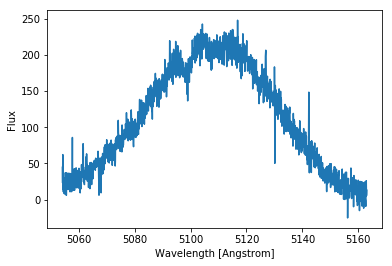

In [4]:
order_number = 49

spectrum = target_spectrum[order_number]
spectrum.plot()

You can also print a spectrum object to see some of its metadata:

In [5]:
print(spectrum)

<Spectrum1D: 5446.7-5564.0 Angstrom>


Now let's remove the blaze function from the target star's spectra by fitting a 10th order polynomial to the standard star's spectrum.

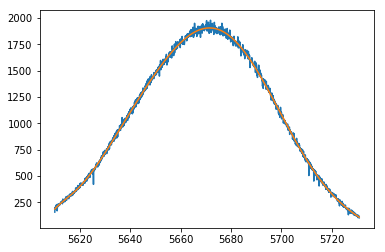

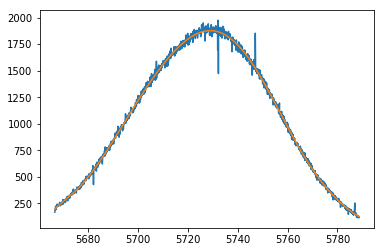

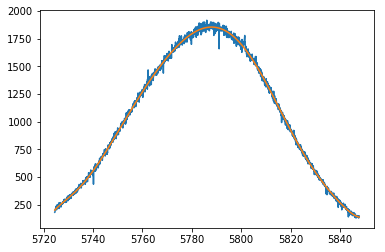

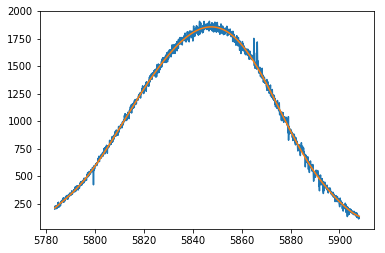

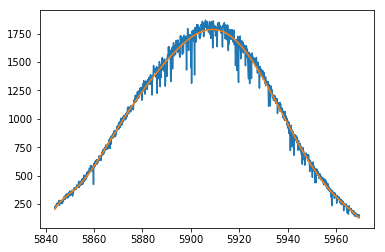

In [6]:
# Specify which orders to normalize:
only_orders = np.arange(60, 65)

target_spectrum.continuum_normalize_from_standard(standard_spectrum, polynomial_order=10,
                                                  only_orders=only_orders, plot_fit=True)

We can see that the spectra in those orders were normalized in-place:

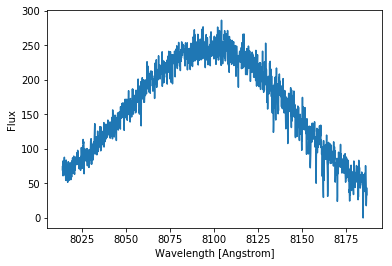

In [13]:
target_spectrum[90].plot()

Let's remove any RV offsets in those orders: 

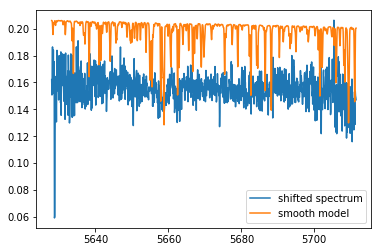

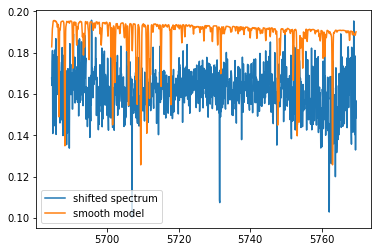

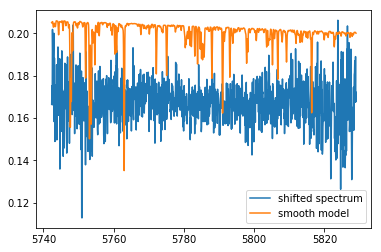

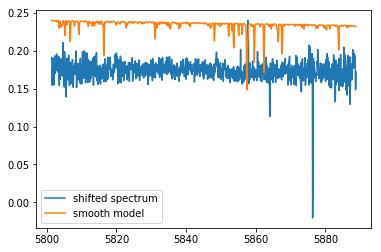

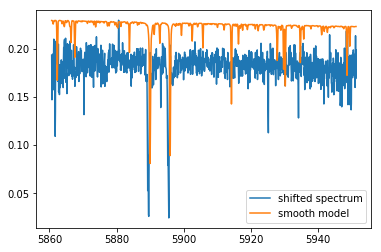

In [14]:
rv_shifts = u.Quantity([target_spectrum.rv_wavelength_shift(order, plot=True)
                        for order in only_orders])
median_rv_shift = np.median(rv_shifts)
target_spectrum.offset_wavelength_solution(median_rv_shift)

We can download PHOENIX model spectra quickly with this function:

In [15]:
from aesop import get_phoenix_model_spectrum

effective_temperature = 5800
log_g = 4.5 

phoenix_model = get_phoenix_model_spectrum(effective_temperature, log_g)

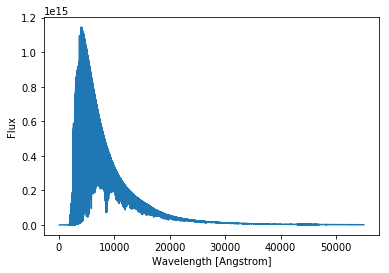

In [16]:
phoenix_model.plot()